<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep29_30/Monte_Carlo_Markov_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [169]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
data = np.loadtxt(file, delimiter = ',').T

In [170]:
x_n = data[0]
y = data[1]
x = (x_n-1864)/4

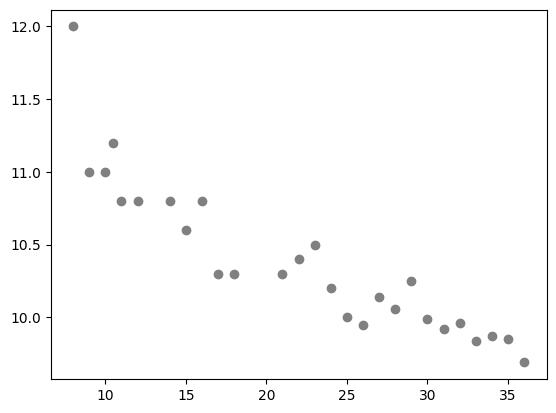

In [171]:
plt.scatter(x,y, color = 'gray')

In [172]:
def w_mat(x,y):
  t = y
  X = np.vstack([np.ones_like(x),x]).T
  X_tX = np.matmul(X.T,X)
  invX_tX = np.linalg.inv(X_tX)
  X_t = np.matmul(X.T, t)
  w = np.matmul(invX_tX, X_t)
  return w

In [173]:
x_test = np.linspace(min(x), max(x), 27)
w_test = w_mat(x,y)
print(w_test)
w_test.shape

[11.56768494 -0.05332354]


(2,)

In [174]:
x_test = np.linspace(min(x), max(x), 27)
y_p = w_test[1]+w_test[0]*x_test

In [175]:
def lnLikelihood(theta, x, y):
  L = 0
  for i in range(len(x)):
    L += (y[i]-theta[0]-theta[1]*x[i])**2
  return np.log(L)

In [176]:
lnPr = np.zeros(2)
lnPr[0] = np.log(1)
lnPr[1] = np.log(0)
lnPr

<ipython-input-176-2a8f716878b5>:3: RuntimeWarning: divide by zero encountered in log
  lnPr[1] = np.log(0)


array([  0., -inf])

In [177]:
def lnPrior(theta, lim):
  a, b = theta
  if (lim[0] < a < lim[1]) and (lim[2] < b < lim[3]):
    return 0.0
  return -np.inf

In [178]:
theta_ini = w_test
theta_ini

array([11.56768494, -0.05332354])

In [179]:
logL = lnLikelihood(theta_ini, x, y)
logL

0.3062280154823994

In [180]:
lnppp = lnPrior(w_test, lim)
lnppp

-inf

In [181]:
def montecarlo(x, y, s1, s2, lim, repeticiones, w):
  chain = [w_test]
  theta_ini = w_test

  for i in range(repeticiones):
    w0 = np.random.normal(theta_ini[0], s1)
    w1 = np.random.normal(theta_ini[1], s2)
    theta_prop = [w0, w1]

    post_nuevo = lnLikelihood(theta_prop, x, y)
    post_viejo = lnLikelihood(theta_ini, x, y)
    prior_nuevo = lnPrior(theta_prop, lim)
    prior_viejo = lnPrior(theta_ini, lim)

    post_nuevo = post_nuevo + prior_nuevo
    post_viejo = post_viejo + prior_viejo

    if (post_nuevo > post_viejo):
      chain.append(theta_prop)
      theta_ini = theta_prop
    else:
      ptest = np.random.uniform(0, 1)
      pnuevo = post_nuevo/post_viejo
      if (pnuevo > ptest):
        chain.append(theta_prop)
        theta_ini = theta_prop
      else:
        chain.append(theta_ini)
  chain = np.array(chain)
  return chain

In [182]:
lim = [-1, 1, 25, 60]
s1 = 0.01
s2 = 0.1
w_test = [-1, 35]
N = 1000

In [183]:
valores1 = montecarlo(x, y, s1, s2, lim, N, w_test)

<ipython-input-181-becf2ad52d27>:23: RuntimeWarning: invalid value encountered in double_scalars
  pnuevo = post_nuevo/post_viejo


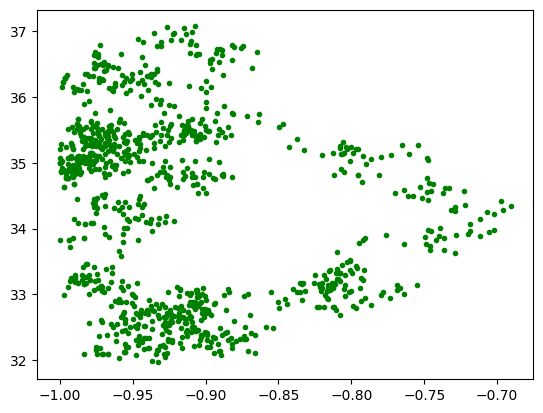

In [185]:
plt.scatter(valores1[:,0], valores1[:,1], s = None, marker='.', color = 'green')

In [186]:
lim = [-1, 1, 25, 60]
s1 = 0.001
s2 = 0.01
w_test = [1, 50]
N = 1000

In [187]:
valores2 = montecarlo(x, y, s1, s2, lim, N, w_test)

<ipython-input-181-becf2ad52d27>:23: RuntimeWarning: invalid value encountered in double_scalars
  pnuevo = post_nuevo/post_viejo


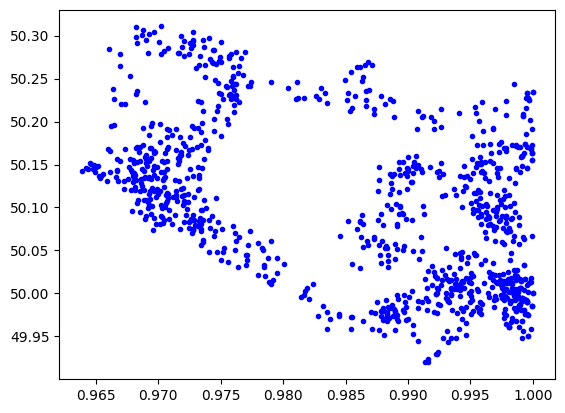

In [188]:
plt.scatter(valores2[:,0], valores2[:,1], s = None, marker='.', color = 'blue')

In [189]:
lim = [-1, 1, 25, 60]
s1 = 0.01
s2 = 0.001
w_test = [1, 25]
N = 1000

In [190]:
valores3 = montecarlo(x, y, s1, s2, lim, N, w_test)

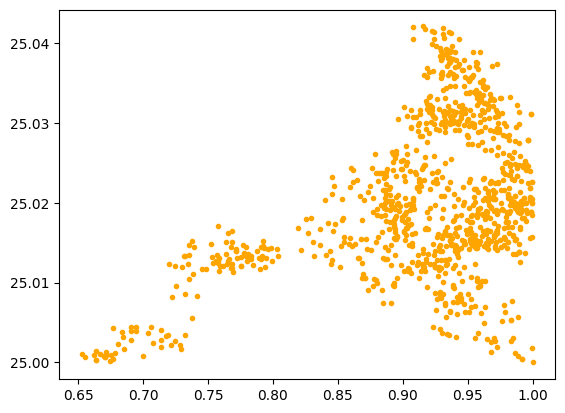

In [191]:
plt.scatter(valores3[:,0], valores3[:,1], s = None, marker='.', color = 'orange')

In [192]:
lim = [-1, 1, 25, 60]
s1 = 0.01
s2 = 0.001
w_test = [-1, 35]
N = 1000

In [193]:
valores4 = montecarlo(x, y, s1, s2, lim, N, w_test)

<ipython-input-181-becf2ad52d27>:23: RuntimeWarning: invalid value encountered in double_scalars
  pnuevo = post_nuevo/post_viejo


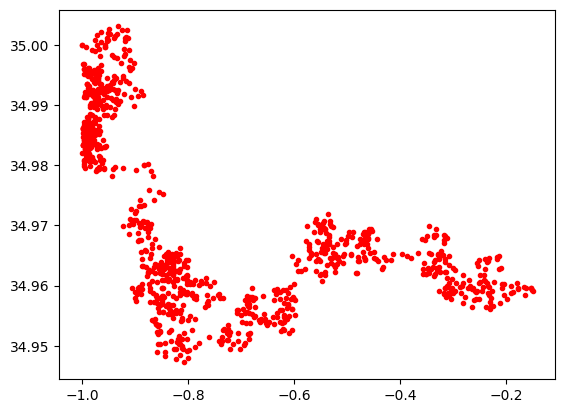

In [194]:
plt.scatter(valores4[:,0], valores4[:,1], s = None, marker='.', color = 'red')

**Gelman-Rubin diagnostic**

$s_{i}^{2}= \frac{1}{n-1}\sum_{t=1}^{n}(X_{it}-\bar{X_{i}})^{2}$

$s^{2}=\frac{1}{m}\sum_{i=1}^{m}s_{i}^{2}$

donde:

$\bar{X_{i}^{2}}$ es el promedio de la i-ésima cadena (de un parámetro dado)

$s_{i}$ es la varianza para la i-ésima cadena

$n$ es el número de muestras en una cadena

$m$ el número de cadenas

In [207]:
X_1 = np.sum(valores1)/1000
X_1
valores = [valores1, valores2, valores3, valores4]
X_prom = np.zeros(4)
for i in range(4):
  X_prom[i] = np.sum(valores[i])/1000
X_prom

array([33.44381363, 51.13756834, 25.96027794, 34.26511849])

In [205]:
X = [np.sum(valores1), np.sum(valores2), np.sum(valores3), np.sum(valores4)]
X

[33443.81362930764, 51137.5683380416, 25960.2779403091, 34265.118492786714]

In [208]:
sumatoria = 0
for i in range(4):
  sumatoria += (X[i]-X_prom[i])**2

sumatoria

5570416375.353168

In [209]:
s_i_cuad = (1/(1000-1))*(sumatoria)
s_i_cuad

5575992.367720888

In [210]:
s = (1/4)*s_i_cuad
s

1393998.091930222

**Compute**

$\frac{B}{n} = \frac{1}{n-1}\sum_{i=1}^{m}(\bar{X_{i}}-\bar{\mu})^{2}$

$\hat{\sigma}^{2}=\frac{n-1}{n}s^{2}+\frac{B}{n}$

$\hat{R} = \sqrt{\frac{\hat{\sigma}^{2}}{s^{2}}}$

In [211]:
mu_prom = np.sum(X_prom)/4
mu_prom

36.20169460011127

In [212]:
sumatoria2 = 0
for i in range(4):
  sumatoria2 += (X_prom[i]-mu_prom)**2

sumatoria2

339.32317398365154

In [213]:
B_n = (1/(1000-1))*sumatoria2
B_n

0.339662836820472

In [214]:
sigma2 = ((1000-1)/(1000))*s + B_n
sigma2

1392604.4335011286

In [216]:
R = np.sqrt(sigma2/s)
R

0.999499996828867